<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/OLAP_%26_OLTP_%7C%7C_Calidad_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/My Drive/datasets/datos_mustra_1.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(655341, 26)

In [5]:
df.duplicated().sum()

8

In [6]:
df.drop_duplicates().shape

(655333, 26)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(655333, 26)

In [9]:
df.isnull().sum()

edad                            0
minutos                         0
monto_de_apoyo                  2
horas                           0
ent_regis                  196392
mun_regis                       0
ent_resid                       0
mun_resid                       0
ent_ocurr                  655333
mun_ocurr                       0
sexo                            2
ocupacion                       0
edo_civil                  655333
lugar_ocur                      0
sitio_ocur                      0
nacionalid                      0
embarazo                        0
grupo                           0
lengua                     504169
clave                           0
escolarida                      0
fecha_nac                   10378
fecha_ocurr                   142
programa_fondo                  0
nombre_del_proyecto             0
nombre_del_beneficiario         0
dtype: int64

In [10]:
df.columns

Index(['edad', 'minutos', 'monto_de_apoyo', 'horas', 'ent_regis', 'mun_regis',
       'ent_resid', 'mun_resid', 'ent_ocurr', 'mun_ocurr', 'sexo', 'ocupacion',
       'edo_civil', 'lugar_ocur', 'sitio_ocur', 'nacionalid', 'embarazo',
       'grupo', 'lengua', 'clave', 'escolarida', 'fecha_nac', 'fecha_ocurr',
       'programa_fondo', 'nombre_del_proyecto', 'nombre_del_beneficiario'],
      dtype='object')

In [11]:
df.head()

,edad,minutos,monto_de_apoyo,horas,ent_regis,mun_regis,ent_resid,mun_resid,ent_ocurr,mun_ocurr,sexo,ocupacion,edo_civil,lugar_ocur,sitio_ocur,nacionalid,embarazo,grupo,lengua,clave,escolarida,fecha_nac,fecha_ocurr,programa_fondo,nombre_del_proyecto,nombre_del_beneficiario
0,4069,27,NaN,16,1.0,1,1,1,NaN,1,NaN,11,NaN,88,3,1,8,7,2.0,6343,1,1946-06-30,2015-05-25,Programa Jalisciense de Fomento a la Propieda...,MX - SISTEMA MECATRÓNICO PARA EL CONTROL DE IN...,RICARDO MERCADO CORTÉS\n
1,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n
2,4092,30,65673.63,16,1.0,1,1,1,NaN,1,1,7,NaN,88,11,1,8,2,NaN,6345,3,1922-06-12,2015-12-14,Programa Jalisciense de Fomento a la Propieda...,MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...,CORPORATIVO BORO S.A. DE C.V.
3,4047,58,"Sistema Tecnológico de Jalisco, A.C.",3,NaN,1,1,1,NaN,1,"Sistema Tecnológico de Jalisco, A.C.",7,NaN,88,9,1,8,13,1.0,6346,6,1967-08-28,2015-01-03,Programa Jalisciense de Fomento a la Propieda...,MX-PASTA BIODEGRADABLE PARA USOS MÚLTIPLES\n,CORPORATIVO BORO S.A. DE C.V.\n
4,4040,50,30254.04,6,1.0,1,1,1,NaN,1,2,11,NaN,88,1,1,5,7,NaN,6364,4,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...,GERALDINA VEGA GAMBOA\n


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655333 entries, 0 to 655332
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   edad                     655333 non-null  int64  
 1   minutos                  655333 non-null  int64  
 2   monto_de_apoyo           655331 non-null  object 
 3   horas                    655333 non-null  int64  
 4   ent_regis                458941 non-null  float64
 5   mun_regis                655333 non-null  int64  
 6   ent_resid                655333 non-null  int64  
 7   mun_resid                655333 non-null  int64  
 8   ent_ocurr                0 non-null       float64
 9   mun_ocurr                655333 non-null  int64  
 10  sexo                     655331 non-null  object 
 11  ocupacion                655333 non-null  int64  
 12  edo_civil                0 non-null       float64
 13  lugar_ocur               655333 non-null  int64  
 14  siti

In [12]:
df.describe()

,edad,minutos,horas,ent_regis,mun_regis,ent_resid,mun_resid,ent_ocurr,mun_ocurr,ocupacion,edo_civil,lugar_ocur,sitio_ocur,nacionalid,embarazo,grupo,lengua,clave,escolarida
count,655333.000000,655333.000000,655333.000000,458941.000000,655333.000000,655333.000000,655333.000000,0.0,655333.000000,655333.000000,0.0,655333.000000,655333.000000,655333.000000,655333.000000,655333.000000,151164.000000,655333.000000,655333.000000
mean,3995.239106,21.949548,12.679938,16.540176,51.515352,16.672460,55.592775,NaN,51.820590,20.473089,NaN,79.271650,9.275178,1.005861,8.006821,6.567649,3.114637,6566.704378,11.887530
std,401.392086,19.509928,11.413132,8.149956,64.580768,8.121961,85.946842,NaN,73.016475,30.057434,NaN,25.557792,13.491876,0.076333,0.488400,6.230990,2.683850,140.182072,25.584275
min,1001.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6343.000000,1.000000
25%,4051.000000,0.000000,6.000000,9.000000,14.000000,10.000000,12.000000,NaN,12.000000,7.000000,NaN,88.000000,3.000000,1.000000,8.000000,2.000000,2.000000,6473.000000,3.000000
50%,4069.000000,20.000000,12.000000,15.000000,33.000000,15.000000,33.000000,NaN,32.000000,11.000000,NaN,88.000000,11.000000,1.000000,8.000000,4.000000,2.000000,6540.000000,4.000000
75%,4082.000000,35.000000,18.000000,22.000000,67.000000,23.000000,70.000000,NaN,67.000000,11.000000,NaN,88.000000,11.000000,1.000000,8.000000,8.000000,2.000000,6689.000000,6.000000
max,4998.000000,99.000000,99.000000,32.000000,570.000000,35.000000,999.000000,NaN,999.000000,99.000000,NaN,88.000000,99.000000,2.000000,9.000000,34.000000,9.000000,6897.000000,99.000000


In [14]:
c_feats=["edad","minutos","monto_de_apoyo","horas"]
v_feats=["ent_regis","mun_regis","ent_resid","mun_resid","ent_ocurr","mun_ocurr","sexo","ocupacion","edo_civil",
        "lugar_ocur","sitio_ocur","nacionalid","embarazo","grupo","lengua","clave","escolarida"]
d_feats=["fecha_nac","fecha_ocurr"]
t_feats=["programa_fondo","nombre_del_proyecto","nombre_del_beneficiario"]

In [15]:
c_feats_new=["c_"+x for x in c_feats]
v_feats_new=["v_"+x for x in v_feats]
d_feats_new=["d_"+x for x in d_feats]
t_feats_new=["t_"+x for x in t_feats]

In [16]:
df.rename(columns=dict(zip(c_feats,c_feats_new)),inplace=True)

In [19]:
print(c_feats)
print(c_feats_new)

['edad', 'minutos', 'monto_de_apoyo', 'horas']
['c_edad', 'c_minutos', 'c_monto_de_apoyo', 'c_horas']


In [21]:
df.columns

Index(['c_edad', 'c_minutos', 'c_monto_de_apoyo', 'c_horas', 'ent_regis',
       'mun_regis', 'ent_resid', 'mun_resid', 'ent_ocurr', 'mun_ocurr', 'sexo',
       'ocupacion', 'edo_civil', 'lugar_ocur', 'sitio_ocur', 'nacionalid',
       'embarazo', 'grupo', 'lengua', 'clave', 'escolarida', 'fecha_nac',
       'fecha_ocurr', 'programa_fondo', 'nombre_del_proyecto',
       'nombre_del_beneficiario'],
      dtype='object')

In [22]:
df.rename(columns=dict(zip(d_feats,d_feats_new)),inplace=True)
df.rename(columns=dict(zip(v_feats,v_feats_new)),inplace=True)
df.rename(columns=dict(zip(t_feats,t_feats_new)),inplace=True)

In [23]:
df.columns

Index(['c_edad', 'c_minutos', 'c_monto_de_apoyo', 'c_horas', 'v_ent_regis',
       'v_mun_regis', 'v_ent_resid', 'v_mun_resid', 'v_ent_ocurr',
       'v_mun_ocurr', 'v_sexo', 'v_ocupacion', 'v_edo_civil', 'v_lugar_ocur',
       'v_sitio_ocur', 'v_nacionalid', 'v_embarazo', 'v_grupo', 'v_lengua',
       'v_clave', 'v_escolarida', 'd_fecha_nac', 'd_fecha_ocurr',
       't_programa_fondo', 't_nombre_del_proyecto',
       't_nombre_del_beneficiario'],
      dtype='object')

In [24]:
df.head()

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_embarazo,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario
0,4069,27,NaN,16,1.0,1,1,1,NaN,1,NaN,11,NaN,88,3,1,8,7,2.0,6343,1,1946-06-30,2015-05-25,Programa Jalisciense de Fomento a la Propieda...,MX - SISTEMA MECATRÓNICO PARA EL CONTROL DE IN...,RICARDO MERCADO CORTÉS\n
1,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n
2,4092,30,65673.63,16,1.0,1,1,1,NaN,1,1,7,NaN,88,11,1,8,2,NaN,6345,3,1922-06-12,2015-12-14,Programa Jalisciense de Fomento a la Propieda...,MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...,CORPORATIVO BORO S.A. DE C.V.
3,4047,58,"Sistema Tecnológico de Jalisco, A.C.",3,NaN,1,1,1,NaN,1,"Sistema Tecnológico de Jalisco, A.C.",7,NaN,88,9,1,8,13,1.0,6346,6,1967-08-28,2015-01-03,Programa Jalisciense de Fomento a la Propieda...,MX-PASTA BIODEGRADABLE PARA USOS MÚLTIPLES\n,CORPORATIVO BORO S.A. DE C.V.\n
4,4040,50,30254.04,6,1.0,1,1,1,NaN,1,2,11,NaN,88,1,1,5,7,NaN,6364,4,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...,GERALDINA VEGA GAMBOA\n


In [26]:
df["v_lengua"].unique()

array([ 2., nan,  1.,  9.])

In [25]:
df["v_lengua"].value_counts()

2.0    113209
9.0     25806
1.0     12149
Name: v_lengua, dtype: int64

In [27]:
df.head()

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_sexo,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_embarazo,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario
0,4069,27,NaN,16,1.0,1,1,1,NaN,1,NaN,11,NaN,88,3,1,8,7,2.0,6343,1,1946-06-30,2015-05-25,Programa Jalisciense de Fomento a la Propieda...,MX - SISTEMA MECATRÓNICO PARA EL CONTROL DE IN...,RICARDO MERCADO CORTÉS\n
1,4093,0,31446.48,6,NaN,1,1,1,NaN,1,1,6,NaN,88,11,1,8,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n
2,4092,30,65673.63,16,1.0,1,1,1,NaN,1,1,7,NaN,88,11,1,8,2,NaN,6345,3,1922-06-12,2015-12-14,Programa Jalisciense de Fomento a la Propieda...,MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...,CORPORATIVO BORO S.A. DE C.V.
3,4047,58,"Sistema Tecnológico de Jalisco, A.C.",3,NaN,1,1,1,NaN,1,"Sistema Tecnológico de Jalisco, A.C.",7,NaN,88,9,1,8,13,1.0,6346,6,1967-08-28,2015-01-03,Programa Jalisciense de Fomento a la Propieda...,MX-PASTA BIODEGRADABLE PARA USOS MÚLTIPLES\n,CORPORATIVO BORO S.A. DE C.V.\n
4,4040,50,30254.04,6,1.0,1,1,1,NaN,1,2,11,NaN,88,1,1,5,7,NaN,6364,4,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...,GERALDINA VEGA GAMBOA\n


In [28]:
df=df[:2000]

In [29]:
sexo=pd.read_csv("/content/drive/My Drive/datasets/desexo.csv")
ocupacion=pd.read_csv("/content/drive/My Drive/datasets/deocupa.csv")
escolaridad=pd.read_csv("/content/drive/My Drive/datasets/deesco.csv")
edad=pd.read_csv("/content/drive/My Drive/datasets/deedad.csv")

In [30]:
df.dtypes

c_edad                         int64
c_minutos                      int64
c_monto_de_apoyo              object
c_horas                        int64
v_ent_regis                  float64
v_mun_regis                    int64
v_ent_resid                    int64
v_mun_resid                    int64
v_ent_ocurr                  float64
v_mun_ocurr                    int64
v_sexo                        object
v_ocupacion                    int64
v_edo_civil                  float64
v_lugar_ocur                   int64
v_sitio_ocur                   int64
v_nacionalid                   int64
v_embarazo                     int64
v_grupo                        int64
v_lengua                     float64
v_clave                        int64
v_escolarida                   int64
d_fecha_nac                   object
d_fecha_ocurr                 object
t_programa_fondo              object
t_nombre_del_proyecto         object
t_nombre_del_beneficiario     object
dtype: object

In [31]:
df.isnull().sum()

c_edad                          0
c_minutos                       0
c_monto_de_apoyo                1
c_horas                         0
v_ent_regis                   583
v_mun_regis                     0
v_ent_resid                     0
v_mun_resid                     0
v_ent_ocurr                  2000
v_mun_ocurr                     0
v_sexo                          1
v_ocupacion                     0
v_edo_civil                  2000
v_lugar_ocur                    0
v_sitio_ocur                    0
v_nacionalid                    0
v_embarazo                      0
v_grupo                         0
v_lengua                     1556
v_clave                         0
v_escolarida                    0
d_fecha_nac                     4
d_fecha_ocurr                   1
t_programa_fondo                0
t_nombre_del_proyecto           0
t_nombre_del_beneficiario       0
dtype: int64

In [32]:
df.isnull().mean()

c_edad                       0.0000
c_minutos                    0.0000
c_monto_de_apoyo             0.0005
c_horas                      0.0000
v_ent_regis                  0.2915
v_mun_regis                  0.0000
v_ent_resid                  0.0000
v_mun_resid                  0.0000
v_ent_ocurr                  1.0000
v_mun_ocurr                  0.0000
v_sexo                       0.0005
v_ocupacion                  0.0000
v_edo_civil                  1.0000
v_lugar_ocur                 0.0000
v_sitio_ocur                 0.0000
v_nacionalid                 0.0000
v_embarazo                   0.0000
v_grupo                      0.0000
v_lengua                     0.7780
v_clave                      0.0000
v_escolarida                 0.0000
d_fecha_nac                  0.0020
d_fecha_ocurr                0.0005
t_programa_fondo             0.0000
t_nombre_del_proyecto        0.0000
t_nombre_del_beneficiario    0.0000
dtype: float64

In [33]:
df["v_lengua"].dtype

dtype('float64')

In [34]:
df["v_sexo"].value_counts()

1                                       1070
2                                        924
MARICELA  LOPEZ CEPEDA\n                   2
SFERP S.C.                                 1
Molina Pasquel Y Henriquez                 1
Sistema Tecnológico de Jalisco, A.C.       1
Name: v_sexo, dtype: int64

In [35]:
df["c_monto_de_apoyo"].value_counts()

12254.04                                375
31450.0                                 121
50336.83                                121
30884.1                                  88
49381.31                                 69
                                       ... 
66465.0                                  11
MARICELA  LOPEZ CEPEDA\n                  2
Sistema Tecnológico de Jalisco, A.C.      1
Molina Pasquel Y Henriquez                1
SFERP S.C.                                1
Name: c_monto_de_apoyo, Length: 89, dtype: int64

In [46]:
# "~" lo que hace es traerte el complemento de la función
#Aquí solo queremos quedarnos con el texto por eso usamos "~"
df[~df["v_sexo"].map(lambda x:str(x).isdigit())]["v_sexo"].value_counts()

MARICELA  LOPEZ CEPEDA\n                2
SFERP S.C.                              1
Sistema Tecnológico de Jalisco, A.C.    1
Molina Pasquel Y Henriquez              1
Name: v_sexo, dtype: int64

In [47]:
#Aquí si nos quedamos con los números
df[df["v_sexo"].map(lambda x:str(x).isdigit())]["v_sexo"].value_counts()

1    1070
2     924
Name: v_sexo, dtype: int64

In [48]:
df=df[df["v_sexo"].map(lambda x:str(x).isdigit())]

In [51]:
df["v_sexo"].value_counts()

1    1070
2     924
Name: v_sexo, dtype: int64

In [49]:
df["v_sexo"].dtype

dtype('O')

In [52]:
df["v_sexo"]=df["v_sexo"].map(int)

In [53]:
df["v_sexo"].dtype

dtype('int64')

In [54]:
df=df.merge(sexo,right_on="CVE",left_on="v_sexo",how="left")

In [55]:
df.drop(columns=["v_sexo","CVE"],inplace=True)
df.rename(columns={"DESCRIP":"v_sexo"},inplace=True)

In [56]:
edad.head(100)

,CVE,DESCRIP
0,1001,Una hora
1,1002,Dos horas
2,1003,Tres horas
3,1004,Cuatro horas
4,1005,Cinco horas
...,...,...
95,4029,Veintinueve años
96,4030,Treinta años
97,4031,Treinta y un años
98,4032,Treinta y dos años


In [57]:
edad=edad[edad["CVE"].astype(str).str.startswith("4")].reset_index(drop=True)

In [58]:
edad.head()

,CVE,DESCRIP
0,4001,Un año
1,4002,Dos años
2,4003,Tres años
3,4004,Cuatro años
4,4005,Cinco años


In [59]:
df=df[df["c_edad"].map(lambda x:str(x).startswith("4"))].reset_index(drop=True).copy()

In [60]:
df.head()

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_embarazo,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,v_sexo
0,4093,0,31446.48,6,NaN,1,1,1,NaN,1,6,NaN,88,11,1,8,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n,Hombres
1,4092,30,65673.63,16,1.0,1,1,1,NaN,1,7,NaN,88,11,1,8,2,NaN,6345,3,1922-06-12,2015-12-14,Programa Jalisciense de Fomento a la Propieda...,MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...,CORPORATIVO BORO S.A. DE C.V.,Hombres
2,4040,50,30254.04,6,1.0,1,1,1,NaN,1,11,NaN,88,1,1,5,7,NaN,6364,4,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...,GERALDINA VEGA GAMBOA\n,Mujeres
3,4089,30,25405.81,15,1.0,1,1,1,NaN,1,11,NaN,88,11,1,8,5,9.0,6367,1,1926-05-04,2015-12-26,Programa Jalisciense de Fomento a la Propieda...,MX-SISTEMA DIFERENCIAL QUE CONTROLA LA TRACCIÓ...,SERVANDO SOTO VELASCO,Hombres
4,4066,43,60336.83,22,1.0,1,1,1,NaN,1,11,NaN,88,3,1,8,6,NaN,6368,3,1949-08-25,2015-02-10,Programa Jalisciense de Fomento a la Propieda...,MX-SISTEMA ACOPLADOR AUTOMATIZADO PARA MÁQUIN...,SERVANDO SOTO VELASCO\n,Mujeres


In [61]:
df["c_edad"]=df["c_edad"].astype(str).str[-3:].astype(int)


In [62]:
df["c_edad"].describe(percentiles=np.arange(0.1,1.1,.1))

count    1917.000000
mean       66.966615
std        42.475695
min         1.000000
10%        34.000000
20%        49.000000
30%        58.000000
40%        64.000000
50%        69.000000
60%        75.000000
70%        80.000000
80%        84.000000
90%        89.000000
100%      998.000000
max       998.000000
Name: c_edad, dtype: float64

In [63]:
df[df["c_edad"]<100].describe(percentiles=np.arange(0.1,1.1,.1))

,c_edad,c_minutos,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_embarazo,v_grupo,v_lengua,v_clave,v_escolarida
count,1900.000000,1900.000000,1900.000000,1349.0,1900.000000,1900.000000,1900.000000,0.0,1900.000000,1900.000000,0.0,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,419.000000,1900.000000,1900.000000
mean,65.235263,22.327895,11.634737,1.0,2.403158,2.178947,5.849474,NaN,1.947895,15.065789,NaN,80.332105,7.145789,1.003158,7.946842,6.231053,3.100239,6565.946316,6.097895
std,20.943891,17.777881,6.571377,0.0,2.673095,5.306864,34.394522,NaN,2.245801,22.409290,NaN,24.176478,7.882116,0.056121,0.657773,5.732016,2.554567,140.657863,13.243930
min,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6343.000000,1.000000
10%,33.900000,0.000000,2.000000,1.0,1.000000,1.000000,1.000000,NaN,1.000000,4.000000,NaN,88.000000,1.000000,1.000000,8.000000,2.000000,2.000000,6380.000000,1.000000
20%,48.000000,0.000000,5.000000,1.0,1.000000,1.000000,1.000000,NaN,1.000000,6.000000,NaN,88.000000,3.000000,1.000000,8.000000,2.000000,2.000000,6453.000000,3.000000
30%,58.000000,8.700000,8.000000,1.0,1.000000,1.000000,1.000000,NaN,1.000000,9.000000,NaN,88.000000,3.000000,1.000000,8.000000,3.000000,2.000000,6484.000000,3.000000
40%,64.000000,15.000000,10.000000,1.0,1.000000,1.000000,1.000000,NaN,1.000000,11.000000,NaN,88.000000,3.000000,1.000000,8.000000,4.000000,2.000000,6507.000000,3.000000
50%,69.000000,22.000000,12.000000,1.0,1.000000,1.000000,1.000000,NaN,1.000000,11.000000,NaN,88.000000,9.000000,1.000000,8.000000,5.000000,2.000000,6539.000000,4.000000
60%,75.000000,30.000000,14.000000,1.0,1.000000,1.000000,1.000000,NaN,1.000000,11.000000,NaN,88.000000,11.000000,1.000000,8.000000,5.000000,2.000000,6563.000000,4.000000


In [64]:
df=df[df["c_edad"]<100]

In [65]:
df.reset_index(drop=True,inplace=True)

In [66]:
df

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_ocupacion,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_embarazo,v_grupo,v_lengua,v_clave,v_escolarida,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,v_sexo
0,93,0,31446.48,6,NaN,1,1,1,NaN,1,6,NaN,88,11,1,8,8,NaN,6344,3,1921-08-25,2015-09-26,Programa Jalisciense de Fomento a la Propieda...,PCT - SISTEMA MECATRÓNICO PARA EL CONTROL DE I...,RICARDO MERCADO CORTÉS\n,Hombres
1,92,30,65673.63,16,1.0,1,1,1,NaN,1,7,NaN,88,11,1,8,2,NaN,6345,3,1922-06-12,2015-12-14,Programa Jalisciense de Fomento a la Propieda...,MX-EMPAQUE CÓNICO PARA LA CONEXIÓN \nDE MANGUE...,CORPORATIVO BORO S.A. DE C.V.,Hombres
2,40,50,30254.04,6,1.0,1,1,1,NaN,1,11,NaN,88,1,1,5,7,NaN,6364,4,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PERSONAL DE COMUNICACIÓN REMOTA PA...,GERALDINA VEGA GAMBOA\n,Mujeres
3,89,30,25405.81,15,1.0,1,1,1,NaN,1,11,NaN,88,11,1,8,5,9.0,6367,1,1926-05-04,2015-12-26,Programa Jalisciense de Fomento a la Propieda...,MX-SISTEMA DIFERENCIAL QUE CONTROLA LA TRACCIÓ...,SERVANDO SOTO VELASCO,Hombres
4,66,43,60336.83,22,1.0,1,1,1,NaN,1,11,NaN,88,3,1,8,6,NaN,6368,3,1949-08-25,2015-02-10,Programa Jalisciense de Fomento a la Propieda...,MX-SISTEMA ACOPLADOR AUTOMATIZADO PARA MÁQUIN...,SERVANDO SOTO VELASCO\n,Mujeres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,94,40,50336.83,11,NaN,1,1,1,NaN,1,11,NaN,88,11,1,8,4,NaN,6456,3,1921-03-22,2015-07-13,Programa Jalisciense de Fomento a la Propieda...,SISTEMA DE SEGURIDAD Y AUTOMATIZACIÓN DE PUNTO...,DENNIS SHERIDAN PLASENCIA,Mujeres
1896,96,20,49381.31,7,1.0,1,1,1,NaN,1,11,NaN,88,4,1,8,3,NaN,6463,8,1918-01-10,2015-04-11,Programa Jalisciense de Fomento a la Propieda...,CONJUNTO DE ELECTROMIÓGRAFO Y PROTESIS MIOELÉC...,ERICK EDUARDO GUZMÁN QUEZADA\n,Hombres
1897,80,30,49381.31,16,NaN,1,32,44,NaN,1,6,NaN,88,9,1,8,4,NaN,6464,3,1934-06-05,2015-02-23,Programa Jalisciense de Fomento a la Propieda...,DISPOSITIVO PARA CALIBRAR LOS PARÁMETROS DE UN...,ERICK EDUARDO GUZMÁN QUEZADA\n,Hombres
1898,60,38,49381.31,11,1.0,1,1,1,NaN,1,7,NaN,88,1,1,8,2,NaN,6465,3,1955-01-24,2015-09-06,Programa Jalisciense de Fomento a la Propieda...,METODOLOGÍA DE MEDICIÓN Y ANÁLISIS GONIO MÉTRI...,ERICK EDUARDO GUZMÁN QUEZADA,Hombres


In [67]:
df["v_ocupacion"].value_counts()

11    1167
6      141
4      108
7      104
2       92
98      89
9       65
8       43
5       29
99      26
3       20
97      12
1        4
Name: v_ocupacion, dtype: int64

In [68]:
df.shape

(1900, 26)

In [69]:
df=df.merge(ocupacion,how="left",left_on="v_ocupacion",right_on="CVE")
df.drop(columns=["CVE","v_ocupacion"],inplace=True)
df.rename(columns={"DESCRIP":"v_ocupacion"},inplace=True)

In [70]:
escolaridad

,CVE,DESCRIP
0,1,Sin escolaridad
1,2,Preescolar
2,3,Primaria incompleta
3,4,Primaria completa
4,5,Secundaria incompleta
5,6,Secundaria completa
6,7,Bachillerato o Preparatoria incompleto
7,8,Bachillerato o Preparatoria completo
8,9,Profesional
9,10,Posgrado


In [71]:
df.columns

Index(['c_edad', 'c_minutos', 'c_monto_de_apoyo', 'c_horas', 'v_ent_regis',
       'v_mun_regis', 'v_ent_resid', 'v_mun_resid', 'v_ent_ocurr',
       'v_mun_ocurr', 'v_edo_civil', 'v_lugar_ocur', 'v_sitio_ocur',
       'v_nacionalid', 'v_embarazo', 'v_grupo', 'v_lengua', 'v_clave',
       'v_escolarida', 'd_fecha_nac', 'd_fecha_ocurr', 't_programa_fondo',
       't_nombre_del_proyecto', 't_nombre_del_beneficiario', 'v_sexo',
       'v_ocupacion'],
      dtype='object')

In [72]:
df=df.merge(escolaridad,how="left",left_on="v_escolarida",right_on="CVE")
df.drop(columns=["CVE","v_escolarida"],inplace=True)
df.rename(columns={"DESCRIP":"v_escolarida"},inplace=True)

In [73]:
df.columns

Index(['c_edad', 'c_minutos', 'c_monto_de_apoyo', 'c_horas', 'v_ent_regis',
       'v_mun_regis', 'v_ent_resid', 'v_mun_resid', 'v_ent_ocurr',
       'v_mun_ocurr', 'v_edo_civil', 'v_lugar_ocur', 'v_sitio_ocur',
       'v_nacionalid', 'v_embarazo', 'v_grupo', 'v_lengua', 'v_clave',
       'd_fecha_nac', 'd_fecha_ocurr', 't_programa_fondo',
       't_nombre_del_proyecto', 't_nombre_del_beneficiario', 'v_sexo',
       'v_ocupacion', 'v_escolarida'],
      dtype='object')

In [74]:
df["d_fecha_ocurr"]=pd.to_datetime(df["d_fecha_ocurr"])

In [75]:
df["d_fecha_ocurr_mes"]=df["d_fecha_ocurr"].map(lambda x:x.month)
df["d_fecha_ocurr_dia"]=df["d_fecha_ocurr"].map(lambda x:x.day)

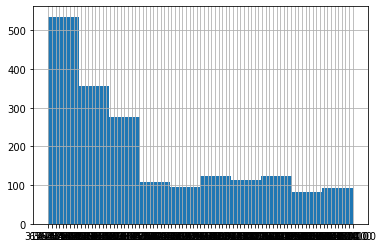

In [76]:
df["c_monto_de_apoyo"].hist()

In [77]:
df.duplicated().sum()

0

## Tratamiento por variable

pip install Unidecode

In [78]:
c_feats=list(df.filter(like="c_").columns)
v_feats=list(df.filter(like="v_").columns)
d_feats=list(df.filter(like="d_").columns)
t_feats=[x for x in list(df.filter(like="t_").columns) if x.startswith("t_")]

In [79]:
t_feats

['t_programa_fondo', 't_nombre_del_proyecto', 't_nombre_del_beneficiario']

In [80]:
c_feats

['c_edad', 'c_minutos', 'c_monto_de_apoyo', 'c_horas']

In [81]:
df["c_edad"]=df["c_edad"].map(int)
df["c_monto_de_apoyo"]=df["c_monto_de_apoyo"].map(float)
df["c_horas"]=df["c_horas"].map(int)
df["c_minutos"]=df["c_minutos"].map(int)

In [82]:
v_feats

['v_ent_regis',
 'v_mun_regis',
 'v_ent_resid',
 'v_mun_resid',
 'v_ent_ocurr',
 'v_mun_ocurr',
 'v_edo_civil',
 'v_lugar_ocur',
 'v_sitio_ocur',
 'v_nacionalid',
 'v_embarazo',
 'v_grupo',
 'v_lengua',
 'v_clave',
 'v_sexo',
 'v_ocupacion',
 'v_escolarida']

In [83]:
df["v_ent_regis"].value_counts()

1.0    1349
Name: v_ent_regis, dtype: int64

In [88]:
pip install unidecode

     |████████████████████████████████| 245kB 4.2MB/s 


In [89]:
from unidecode import unidecode

In [90]:
df["v_escolarida"].value_counts(1)

Primaria incompleta                       0.315263
Primaria completa                         0.213158
Sin escolaridad                           0.143684
Secundaria completa                       0.099474
Profesional                               0.072105
Bachillerato o Preparatoria completo      0.066842
Secundaria incompleta                     0.032632
Bachillerato o Preparatoria incompleto    0.026842
No especificado                           0.016842
Posgrado                                  0.007368
No aplica a menores de 3 años             0.003158
Preescolar                                0.002632
Name: v_escolarida, dtype: float64

In [91]:
df["v_escolarida"]=df["v_escolarida"].map(lambda x:x.lower())

In [92]:
df["v_escolarida"].head()

0    primaria incompleta
1    primaria incompleta
2      primaria completa
3        sin escolaridad
4    primaria incompleta
Name: v_escolarida, dtype: object

In [93]:
aux=pd.DataFrame(df["v_escolarida"].value_counts(1))

In [94]:
aux=aux.reset_index()

In [95]:
aux[aux["v_escolarida"]<.02]

,index,v_escolarida
8,no especificado,0.016842
9,posgrado,0.007368
10,no aplica a menores de 3 años,0.003158
11,preescolar,0.002632


In [96]:
dictio_otro=dict(zip(list(aux[aux["v_escolarida"]<.02]["index"].values),["otro"]*4))

In [97]:
df["v_escolarida"].replace(dictio_otro).value_counts()

primaria incompleta                       599
primaria completa                         405
sin escolaridad                           273
secundaria completa                       189
profesional                               137
bachillerato o preparatoria completo      127
secundaria incompleta                      62
otro                                       57
bachillerato o preparatoria incompleto     51
Name: v_escolarida, dtype: int64

In [98]:
df["v_escolarida"].map(dictio_otro).value_counts(1,dropna=False)

NaN     0.97
otro    0.03
Name: v_escolarida, dtype: float64

In [99]:
df["v_escolarida"]=df["v_escolarida"].replace(dictio_otro)

In [100]:
df["v_escolarida"].value_counts()

primaria incompleta                       599
primaria completa                         405
sin escolaridad                           273
secundaria completa                       189
profesional                               137
bachillerato o preparatoria completo      127
secundaria incompleta                      62
otro                                       57
bachillerato o preparatoria incompleto     51
Name: v_escolarida, dtype: int64

In [101]:
d_feats

['d_fecha_nac', 'd_fecha_ocurr', 'd_fecha_ocurr_mes', 'd_fecha_ocurr_dia']

In [102]:
df["d_fecha_nac"].dtype

dtype('O')

In [103]:
df["d_fecha_nac"].iloc[[0,1]]=["1","11"]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [104]:
df["d_fecha_nac"]

0                1
1               11
2       1974-12-17
3       1926-05-04
4       1949-08-25
           ...    
1895    1921-03-22
1896    1918-01-10
1897    1934-06-05
1898    1955-01-24
1899    1919-12-29
Name: d_fecha_nac, Length: 1900, dtype: object

In [105]:
df["d_fecha_nac"]

0                1
1               11
2       1974-12-17
3       1926-05-04
4       1949-08-25
           ...    
1895    1921-03-22
1896    1918-01-10
1897    1934-06-05
1898    1955-01-24
1899    1919-12-29
Name: d_fecha_nac, Length: 1900, dtype: object

In [106]:
df["d_fecha_nac"]=pd.to_datetime(df["d_fecha_nac"],errors="coerce")

In [107]:
df=df[df["d_fecha_nac"].isnull()!=True]

In [108]:
df["v_fecha_nac_month"]=df["d_fecha_nac"].map(lambda x:x.month)

In [109]:
t_feats

['t_programa_fondo', 't_nombre_del_proyecto', 't_nombre_del_beneficiario']

In [110]:
df[t_feats[1]].value_counts()

MODELO INDUSTRIAL DE MUEBLE\n                                                                                                                                                                                 81
MODELO INDUSTRIAL DE UNA BASE PARA MESA\n                                                                                                                                                                     44
MODELO INDUSTRIAL DE UNA BASE CUADRADA PARA MESA\n                                                                                                                                                            41
MODELO INDUSTRIAL DE UNA BASE RECTANGULAR PARA MESA\n                                                                                                                                                         21
TARIMA PARA CARGA CON SOPORTE BASTIDOR Y CUBIERTA INTERCAMBIABLE\n                                                                                                  

In [111]:
df[t_feats[1]].map(lambda x:unidecode(x.lower()).strip()).value_counts()

modelo industrial de mueble                                                                                         81
modelo industrial de una base para mesa                                                                             44
modelo industrial de una base cuadrada para mesa                                                                    41
dispositivo para calibrar los parametros de un generador de senales electronicas.                                   23
modelo industrial de una base rectangular para mesa                                                                 21
                                                                                                                    ..
modelo industrial de mueble para hortalizas o plantas de dos niveles                                                 9
modelo industrial de plato de comida para gato anti insectos                                                         9
participacion de comunidad estudiantil y docente

In [112]:
df[t_feats[1]]=df[t_feats[1]].map(lambda x:unidecode(x.lower()).strip())

In [113]:
df

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_embarazo,v_grupo,v_lengua,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,v_sexo,v_ocupacion,v_escolarida,d_fecha_ocurr_mes,d_fecha_ocurr_dia,v_fecha_nac_month
2,40,50,30254.04,6,1.0,1,1,1,NaN,1,NaN,88,1,1,5,7,NaN,6364,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,dispositivo personal de comunicacion remota pa...,GERALDINA VEGA GAMBOA\n,Mujeres,No trabaja,primaria completa,7,16,12
3,89,30,25405.81,15,1.0,1,1,1,NaN,1,NaN,88,11,1,8,5,9.0,6367,1926-05-04,2015-12-26,Programa Jalisciense de Fomento a la Propieda...,mx-sistema diferencial que controla la traccio...,SERVANDO SOTO VELASCO,Hombres,No trabaja,sin escolaridad,12,26,5
4,66,43,60336.83,22,1.0,1,1,1,NaN,1,NaN,88,3,1,8,6,NaN,6368,1949-08-25,2015-02-10,Programa Jalisciense de Fomento a la Propieda...,mx-sistema acoplador automatizado para maquina...,SERVANDO SOTO VELASCO\n,Mujeres,No trabaja,primaria incompleta,2,10,8
5,67,30,62150.30,9,1.0,1,1,1,NaN,1,NaN,88,11,1,8,2,NaN,6375,1948-05-29,2015-02-05,Programa Jalisciense de Fomento a la Propieda...,pct-pasta biodegradable para usos multiples,CORPORATIVO BORO S.A. DE C.V.\n,Mujeres,No trabaja,sin escolaridad,2,5,5
6,44,0,62150.30,3,1.0,1,1,1,NaN,1,NaN,88,11,1,8,5,NaN,6377,1971-08-20,2015-01-17,Programa Jalisciense de Fomento a la Propieda...,pct-empaque conico para la conexion de manguer...,CORPORATIVO BORO S.A. DE C.V.,Hombres,Profesionistas y técnicos,profesional,1,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,94,40,50336.83,11,NaN,1,1,1,NaN,1,NaN,88,11,1,8,4,NaN,6456,1921-03-22,2015-07-13,Programa Jalisciense de Fomento a la Propieda...,sistema de seguridad y automatizacion de punto...,DENNIS SHERIDAN PLASENCIA,Mujeres,No trabaja,primaria incompleta,7,13,3
1896,96,20,49381.31,7,1.0,1,1,1,NaN,1,NaN,88,4,1,8,3,NaN,6463,1918-01-10,2015-04-11,Programa Jalisciense de Fomento a la Propieda...,conjunto de electromiografo y protesis mioelec...,ERICK EDUARDO GUZMÁN QUEZADA\n,Hombres,No trabaja,bachillerato o preparatoria completo,4,11,1
1897,80,30,49381.31,16,NaN,1,32,44,NaN,1,NaN,88,9,1,8,4,NaN,6464,1934-06-05,2015-02-23,Programa Jalisciense de Fomento a la Propieda...,dispositivo para calibrar los parametros de un...,ERICK EDUARDO GUZMÁN QUEZADA\n,Hombres,"Trabajadores en actividades agrícolas, ganader...",primaria incompleta,2,23,6
1898,60,38,49381.31,11,1.0,1,1,1,NaN,1,NaN,88,1,1,8,2,NaN,6465,1955-01-24,2015-09-06,Programa Jalisciense de Fomento a la Propieda...,metodologia de medicion y analisis gonio metri...,ERICK EDUARDO GUZMÁN QUEZADA,Hombres,Trabajadores artesanales,primaria incompleta,9,6,1


In [114]:
df.isnull().sum()

c_edad                          0
c_minutos                       0
c_monto_de_apoyo                0
c_horas                         0
v_ent_regis                   550
v_mun_regis                     0
v_ent_resid                     0
v_mun_resid                     0
v_ent_ocurr                  1897
v_mun_ocurr                     0
v_edo_civil                  1897
v_lugar_ocur                    0
v_sitio_ocur                    0
v_nacionalid                    0
v_embarazo                      0
v_grupo                         0
v_lengua                     1478
v_clave                         0
d_fecha_nac                     0
d_fecha_ocurr                   0
t_programa_fondo                0
t_nombre_del_proyecto           0
t_nombre_del_beneficiario       0
v_sexo                          0
v_ocupacion                     0
v_escolarida                    0
d_fecha_ocurr_mes               0
d_fecha_ocurr_dia               0
v_fecha_nac_month               0
dtype: int64

In [115]:
df.dtypes

c_edad                                int64
c_minutos                             int64
c_monto_de_apoyo                    float64
c_horas                               int64
v_ent_regis                         float64
v_mun_regis                           int64
v_ent_resid                           int64
v_mun_resid                           int64
v_ent_ocurr                         float64
v_mun_ocurr                           int64
v_edo_civil                         float64
v_lugar_ocur                          int64
v_sitio_ocur                          int64
v_nacionalid                          int64
v_embarazo                            int64
v_grupo                               int64
v_lengua                            float64
v_clave                               int64
d_fecha_nac                  datetime64[ns]
d_fecha_ocurr                datetime64[ns]
t_programa_fondo                     object
t_nombre_del_proyecto                object
t_nombre_del_beneficiario       

In [116]:
df

,c_edad,c_minutos,c_monto_de_apoyo,c_horas,v_ent_regis,v_mun_regis,v_ent_resid,v_mun_resid,v_ent_ocurr,v_mun_ocurr,v_edo_civil,v_lugar_ocur,v_sitio_ocur,v_nacionalid,v_embarazo,v_grupo,v_lengua,v_clave,d_fecha_nac,d_fecha_ocurr,t_programa_fondo,t_nombre_del_proyecto,t_nombre_del_beneficiario,v_sexo,v_ocupacion,v_escolarida,d_fecha_ocurr_mes,d_fecha_ocurr_dia,v_fecha_nac_month
2,40,50,30254.04,6,1.0,1,1,1,NaN,1,NaN,88,1,1,5,7,NaN,6364,1974-12-17,2015-07-16,Programa Jalisciense de Fomento a la Propieda...,dispositivo personal de comunicacion remota pa...,GERALDINA VEGA GAMBOA\n,Mujeres,No trabaja,primaria completa,7,16,12
3,89,30,25405.81,15,1.0,1,1,1,NaN,1,NaN,88,11,1,8,5,9.0,6367,1926-05-04,2015-12-26,Programa Jalisciense de Fomento a la Propieda...,mx-sistema diferencial que controla la traccio...,SERVANDO SOTO VELASCO,Hombres,No trabaja,sin escolaridad,12,26,5
4,66,43,60336.83,22,1.0,1,1,1,NaN,1,NaN,88,3,1,8,6,NaN,6368,1949-08-25,2015-02-10,Programa Jalisciense de Fomento a la Propieda...,mx-sistema acoplador automatizado para maquina...,SERVANDO SOTO VELASCO\n,Mujeres,No trabaja,primaria incompleta,2,10,8
5,67,30,62150.30,9,1.0,1,1,1,NaN,1,NaN,88,11,1,8,2,NaN,6375,1948-05-29,2015-02-05,Programa Jalisciense de Fomento a la Propieda...,pct-pasta biodegradable para usos multiples,CORPORATIVO BORO S.A. DE C.V.\n,Mujeres,No trabaja,sin escolaridad,2,5,5
6,44,0,62150.30,3,1.0,1,1,1,NaN,1,NaN,88,11,1,8,5,NaN,6377,1971-08-20,2015-01-17,Programa Jalisciense de Fomento a la Propieda...,pct-empaque conico para la conexion de manguer...,CORPORATIVO BORO S.A. DE C.V.,Hombres,Profesionistas y técnicos,profesional,1,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,94,40,50336.83,11,NaN,1,1,1,NaN,1,NaN,88,11,1,8,4,NaN,6456,1921-03-22,2015-07-13,Programa Jalisciense de Fomento a la Propieda...,sistema de seguridad y automatizacion de punto...,DENNIS SHERIDAN PLASENCIA,Mujeres,No trabaja,primaria incompleta,7,13,3
1896,96,20,49381.31,7,1.0,1,1,1,NaN,1,NaN,88,4,1,8,3,NaN,6463,1918-01-10,2015-04-11,Programa Jalisciense de Fomento a la Propieda...,conjunto de electromiografo y protesis mioelec...,ERICK EDUARDO GUZMÁN QUEZADA\n,Hombres,No trabaja,bachillerato o preparatoria completo,4,11,1
1897,80,30,49381.31,16,NaN,1,32,44,NaN,1,NaN,88,9,1,8,4,NaN,6464,1934-06-05,2015-02-23,Programa Jalisciense de Fomento a la Propieda...,dispositivo para calibrar los parametros de un...,ERICK EDUARDO GUZMÁN QUEZADA\n,Hombres,"Trabajadores en actividades agrícolas, ganader...",primaria incompleta,2,23,6
1898,60,38,49381.31,11,1.0,1,1,1,NaN,1,NaN,88,1,1,8,2,NaN,6465,1955-01-24,2015-09-06,Programa Jalisciense de Fomento a la Propieda...,metodologia de medicion y analisis gonio metri...,ERICK EDUARDO GUZMÁN QUEZADA,Hombres,Trabajadores artesanales,primaria incompleta,9,6,1


In [117]:
df[["v_ocupacion", "c_edad"]].groupby(["v_ocupacion"]).agg(["mean", "count"])

c_edad      
                                                         mean count
v_ocupacion                                                        
Comerciantes, empleados en ventas y agentes de ...  63.907407   108
Funcionarios, directores y jefes                    53.750000     4
No aplica a menores de 5 años                        2.500000    12
No trabaja                                          68.687232  1167
Ocupaciones insuficientemente especificadas         46.651685    89
Ocupación no especificada                           45.920000    25
Operadores de maquinaria industrial, ensamblado...  56.697674    43
Profesionistas y técnicos                           58.543478    92
Trabajadores artesanales                            56.582524   103
Trabajadores auxiliares en actividades administ...  54.450000    20
Trabajadores en actividades agrícolas, ganadera...  75.892857   140
Trabajadores en actividades elementales y de apoyo  61.861538    65
Trabajadores en servicios personales y vigilancia   57.655172    29

In [118]:
df.columns

Index(['c_edad', 'c_minutos', 'c_monto_de_apoyo', 'c_horas', 'v_ent_regis',
       'v_mun_regis', 'v_ent_resid', 'v_mun_resid', 'v_ent_ocurr',
       'v_mun_ocurr', 'v_edo_civil', 'v_lugar_ocur', 'v_sitio_ocur',
       'v_nacionalid', 'v_embarazo', 'v_grupo', 'v_lengua', 'v_clave',
       'd_fecha_nac', 'd_fecha_ocurr', 't_programa_fondo',
       't_nombre_del_proyecto', 't_nombre_del_beneficiario', 'v_sexo',
       'v_ocupacion', 'v_escolarida', 'd_fecha_ocurr_mes', 'd_fecha_ocurr_dia',
       'v_fecha_nac_month'],
      dtype='object')

In [119]:
df[["c_edad", "v_escolarida", "v_sexo"]].groupby(["v_escolarida", "v_sexo"]).agg(["mean", "min", "max", "count"])


c_edad              
                                                     mean min max count
v_escolarida                           v_sexo                          
bachillerato o preparatoria completo   Hombres  54.493333  17  96    75
                                       Mujeres  52.576923  18  88    52
bachillerato o preparatoria incompleto Hombres  48.763158  15  81    38
                                       Mujeres  50.461538  15  84    13
otro                                   Hombres  59.058824   1  90    34
                                       Mujeres  59.318182   1  91    22
primaria completa                      Hombres  63.422018  12  98   218
                                       Mujeres  68.748663  19  96   187
primaria incompleta                    Hombres  72.511401   9  97   307
                                       Mujeres  73.234483   9  98   290
profesional                            Hombres  61.000000  18  95    85
                                       Mujeres  62.115385  24  95    52
secundaria completa                    Hombres  48.578947  14  94   114
                                       Mujeres  54.706667  15  92    75
secundaria incompleta                  Hombres  41.088889  13  91    45
                                       Mujeres  51.117647  13  98    17
sin escolaridad                        Hombres  72.728972   3  98   107
                                       Mujeres  74.000000   3  98   166

In [120]:
aux=df[(df["v_sexo"]=="Mujeres")&(df["c_edad"]<30)]

In [121]:
aux["c_monto_de_apoyo"].mean()

142796.75452830186

In [122]:
df[["c_monto_de_apoyo","v_ocupacion"]].groupby(["v_ocupacion"]).agg(["mean","median"])

c_monto_de_apoyo          
                                                               mean    median
v_ocupacion                                                                  
Comerciantes, empleados en ventas y agentes de ...    219034.861944  58700.35
Funcionarios, directores y jefes                      148288.965000  40450.91
No aplica a menores de 5 años                         455282.125000  40415.50
No trabaja                                            283841.743745  50336.82
Ocupaciones insuficientemente especificadas           128926.161461  49381.31
Ocupación no especificada                             215961.480000  30884.10
Operadores de maquinaria industrial, ensamblado...     77688.283023  50336.83
Profesionistas y técnicos                             286736.807065  54518.59
Trabajadores artesanales                              320857.175049  49381.31
Trabajadores auxiliares en actividades administ...    213643.108500  55336.83
Trabajadores en actividades agrícolas, ganadera...    240815.406000  50000.00
Trabajadores en actividades elementales y de apoyo    382480.015077  60000.00
Trabajadores en servicios personales y vigilancia     237410.894828  50336.83

In [123]:
df[["v_sexo","v_ocupacion"]].groupby(["v_sexo"]).agg(["count"])

,v_ocupacion
,count
v_sexo,
Hombres,1023
Mujeres,874
